# Customer Segmentation Using RFM and K-Means

# Project Overview

We analyzed retail transaction data from an online store and used RFM feature engineering to create a dataset ideal for customer segmentation. By applying K-Means clustering, we grouped customers into meaningful clusters based on their shopping behavior.

We applied **RFM Analysis** (Recency, Frequency, Monetary) to engineer features that capture customer behavior, and then use **K-Means clustering** to segment the customers into distinct groups.

This project is developed in **Google Colab**, version-controlled on **GitHub**, and shared professionally on **LinkedIn**.

**Tools & Techniques:**
- Language: Python   
- IDE: Google Colab
- Libraries: pandas, numpy,   matplotlib, seaborn, scikit-learn, scipy
- RFM Feature Engineering
- K-Means Clustering
- Data Scaling (StandardScaler)


**About the dataset**

Online retail is a transactional dataset which contains all the transactions occuring between 01/12/2010and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occassion gifts. Many customers of the company are wholesalers

Columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

**Business Goal**

We aim to segement the Customers based on k-means so that the company can target its customers efficiently which will help in improving customer retention, increasing sales, and optimizing campaign efforts

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Load Dataset

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('/content/OnlineRetail.xls', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Description	1,454	We Ignore for now — not needed for RFM

In [ ]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


It reveals critical insights about the data before we scale or cluster


# Exploratory Data Analysis (EDA), Data Cleaning & Feature Engineering

In this step, we:
- Remove rows with missing `CustomerID`
  Inspect the dataset for structure and anomalies
- Create a `TotalAmount` column (Monetary = Quantity × UnitPrice)
- Creat  customer-level features:
  - **Monetary**: total revenue contributed
  - **Frequency**: number of unique purchases

At the end, we will have one row per customer for clustering.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/OnlineRetail.xls', encoding='latin1')


# Removing missing values
data = data[data['CustomerID'].notnull()]

# Removing returns and invalid rows (negative Quantity or UnitPrice)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [ ]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,397884,397884,397884,397884.000000,397884,397884.000000,397884.000000,397884
unique,18532,3665,3877,NaN,17282,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,14-11-2011 15:27,NaN,NaN,United Kingdom
freq,542,2035,2028,NaN,542,NaN,NaN,354321
mean,NaN,NaN,NaN,12.988238,NaN,3.116488,15294.423453,NaN
std,NaN,NaN,NaN,179.331775,NaN,22.097877,1713.141560,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15159.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16795.000000,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
data = train_data.dropna()

In [ ]:
# Changing the datatype of Customer ID as per business understanding
data['CustomerID'] = data['CustomerID'].astype(str)

# RFM Feature Creation 📊

**RFM Analysis** is a marketing technique used to quantify customer behavior by analyzing three metrics:

- **Recency**: How recently a customer made a purchase
- **Frequency**: How often the customer makes purchases
- **Monetary**: How much money the customer spends

We will calculate these features for each customer based on their transaction history. These features will later be used for customer segmentation using clustering algorithms like K-Means.

In [ ]:
# Creating the Monetary Feature
# Calculating the amount of monies the customers bring
data['Amount'] = data['Quantity']* data['UnitPrice']
feature_mon = data.groupby('CustomerID')['Amount'].sum()
feature_mon = feature_mon.reset_index()
feature_mon.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,3621.88
2,12348.0,1336.24
3,12349.0,1228.35
4,12350.0,241.40


In [ ]:
# Creating the frequency feature
feature_freq = data.groupby('CustomerID')['InvoiceNo'].count()
feature_freq = feature_freq.reset_index()
feature_freq.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,148
2,12348.0,25
3,12349.0,60
4,12350.0,12


New df Creation

In [ ]:
new_df = pd.merge(feature_mon, feature_freq, on='CustomerID', how='inner')
new_df.columns = ['CustomerID', 'Amount', 'Frequency']
new_df.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,3621.88,148
2,12348.0,1336.24,25
3,12349.0,1228.35,60
4,12350.0,241.40,12


In [ ]:
final_data = new_df[['Amount', 'Frequency']]

# 📉 Outlier Removal

In [ ]:
from scipy import stats
final_data = new_df[['Amount', 'Frequency']]

def remove_outliers(df, thresh=3):
  z_scores = np.abs(stats.zscore(df))
  df = df[(z_scores < thresh).all(axis=1)]

  return df

clean_df = remove_outliers(final_data)

clean_df.shape

(4273, 2)

Visualing the clean_df

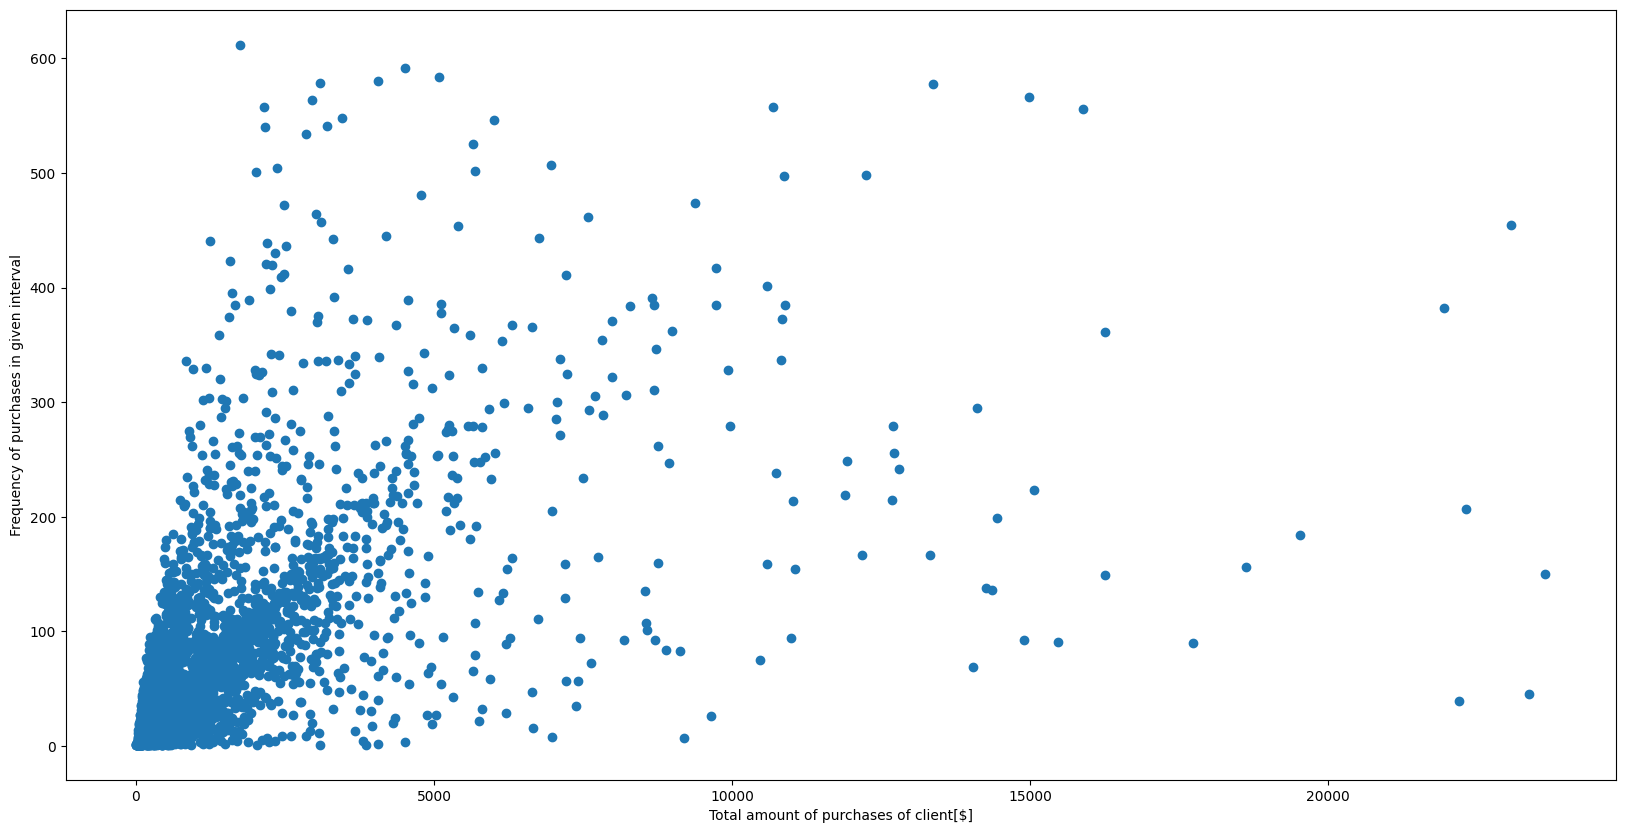

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(clean_df['Amount'], clean_df['Frequency'])
plt.xlabel('Total amount of purchases of client[$]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

# Data Scaling

# K-Means Clustering

In [ ]:
# Applying KMEANS
model = KMeans(n_clusters=10, max_iter=1000)
model.fit(clean_df)

KMeans(max_iter=1000, n_clusters=10)

Visualizing the Cluster

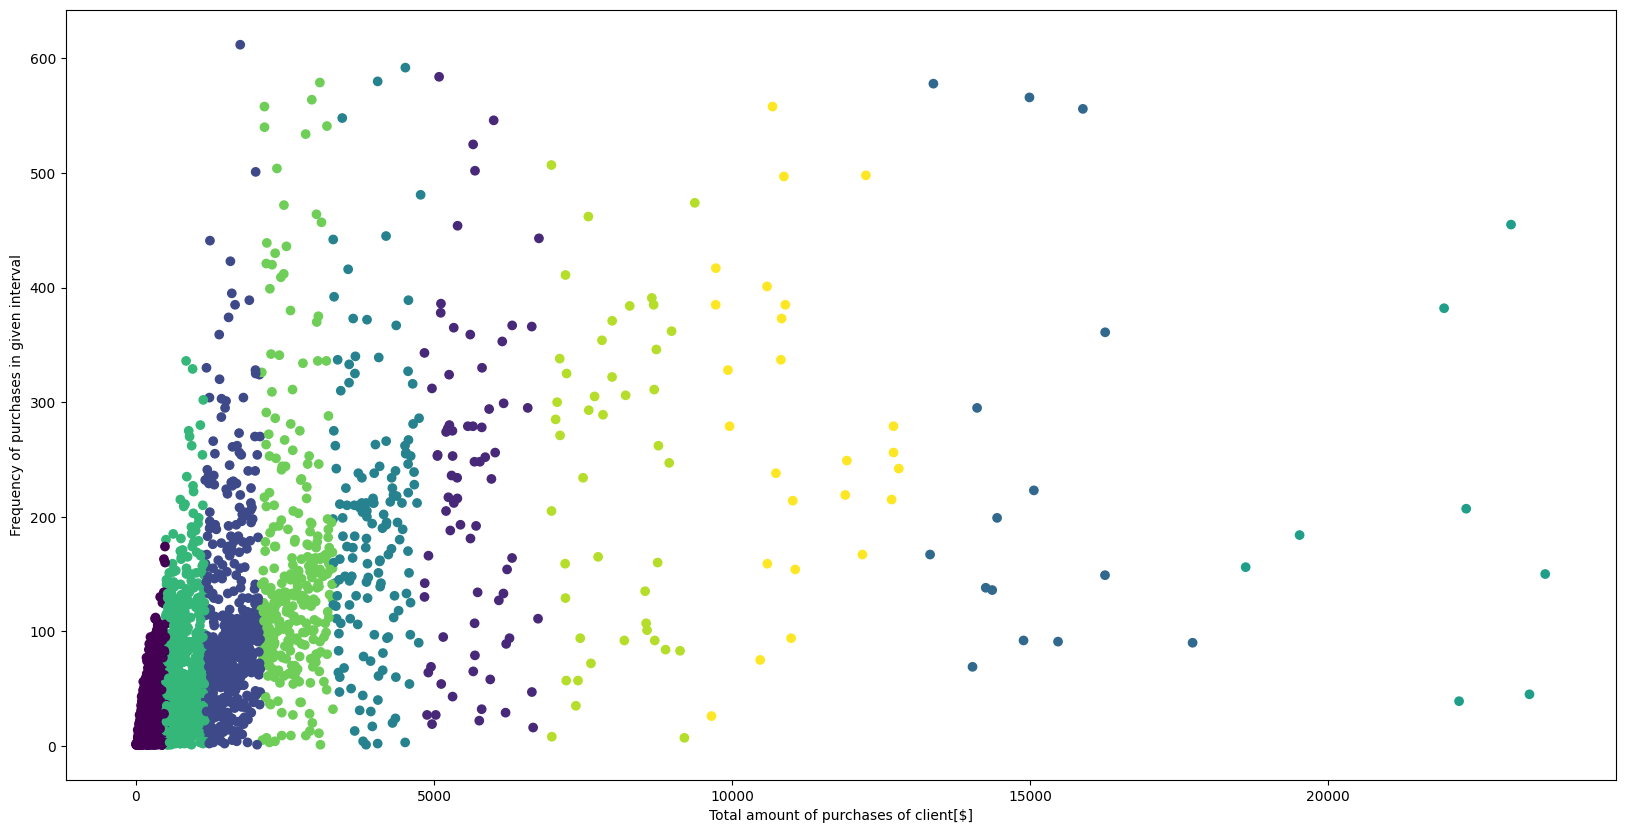

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(clean_df['Amount'], clean_df['Frequency'], c=model.labels_)
plt.xlabel('Total amount of purchases of client[$]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

# Cluster Interpretation

Now that we've applied K-Means clustering, we interpret the meaning of each cluster. Each group represents customers with similar purchasing patterns based on:

- **Amount**: Total spending
- **Frequency**: Number of purchases

This helps us identify high-value customers, one-time buyers, and potentially inactive customers.


In [ ]:
# Add cluster labels to clean_df
clean_df['Cluster'] = model.labels_

# Group and describe
cluster_summary = clean_df.groupby('Cluster').agg({
    'Amount': 'mean',
    'Frequency': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Num_Customers'}).round(2)

cluster_summary

/tmp/ipython-input-64305046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cluster'] = model.labels_


,Amount,Frequency,Num_Customers
Cluster,,,
0,242.96,20.50,2044
1,5613.16,221.03,73
2,1554.00,98.23,574
3,14963.17,247.33,15
4,3970.49,190.74,145
5,21834.50,202.25,8
6,765.57,55.90,1042
7,2627.63,153.96,303
8,7973.57,235.84,44


# Export Results

We'll export the customer segmentation results to a CSV file for future analysis, dashboarding, or business use.


In [ ]:
# Reset index and include CustomerID if needed
final_export = clean_df.reset_index(drop=True)

# Save as CSV
final_export.to_csv('customer_segments.csv', index=False)

# Download in Colab
from google.colab import files
files.download('customer_segments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

- We used retail transaction data to engineer **RFM features** (Amount and Frequency).
- Cleaned the data by removing outliers and invalid values.
- Applied **K-Means clustering** to group customers into behavioral segments.
- Interpreted clusters to identify customer types (e.g. high spenders, frequent buyers).

# Next Steps

# Evaluate Cluster Quality

We use the **Elbow Method** and **Silhouette Score** to find the optimal number of clusters for K-Means.


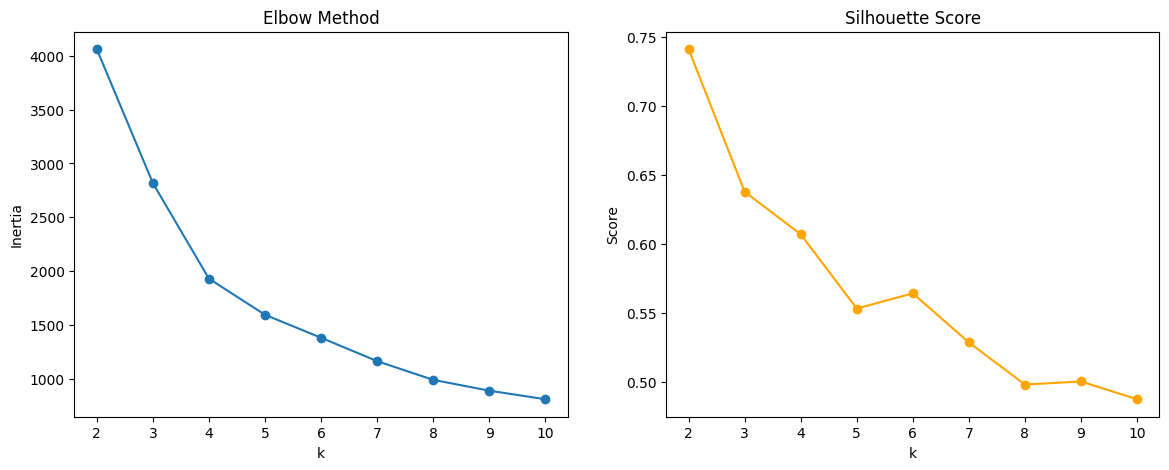

In [ ]:
from sklearn.metrics import silhouette_score

X = clean_df[['Amount', 'Frequency']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
silhouette = []

k_range = range(2, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(X_scaled, model.labels_))

# Plotting
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.show()

# Alternative Clustering Models

We explore other clustering techniques like **DBSCAN**, **Agglomerative Clustering**, and **Gaussian Mixture Models (GMM)** to compare against K-Means.


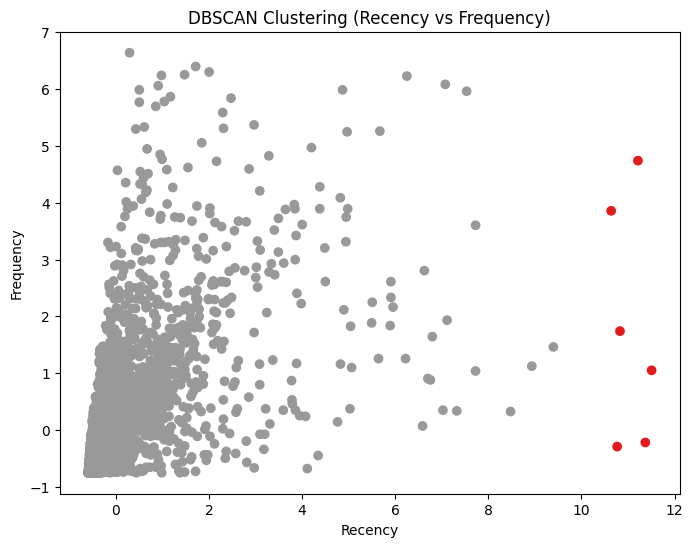

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

# Visualize DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_labels, cmap='Set1')
plt.title('DBSCAN Clustering (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Business Impact

These customer segments can now drive targeted business strategies:

- 🎯 Personalized marketing campaigns
- 🎁 Loyalty program targeting for frequent/high-spending customers
- 🔄 Retargeting inactive or low-engagement customers
- 📈 Customer Lifetime Value (CLV) estimation
- 🧠 Strategic planning for promotions and inventory
